In [1]:
import emcee
from single_plane_lens import CustomPrior
from single_plane_lens import li24_df
from hierarc.Sampling.mcmc_sampling import MCMCSampler
from copy import deepcopy
from pandas import DataFrame
import matplotlib.pyplot as plt

from chainconsumer import Chain
from chainconsumer import ChainConsumer
from chainconsumer import PlotConfig
from chainconsumer import ChainConfig
from chainconsumer.plotting import plot_contour

from defaults import *
from plot_util import *

In [41]:
run_mcmc_dspl = False
run_mcmc_lensed_sn = False
run_mcmc_lensed_quasar = False
run_mcmc_sl_combined = False

save_figures = True

# Double-source-plane lenses

In [3]:
from double_source_plane_lens import kwargs_sampler_dspl
from double_source_plane_lens import kwargs_emcee_dspl
from double_source_plane_lens import kwargs_likelihood_list_dspl

In [4]:
n_run = 10000
n_burn = 0
n_walkers = 100
continue_from_backend = True


kwargs_emcee_dspl["n_run"] = n_run
kwargs_emcee_dspl["n_burn"] = n_burn
kwargs_emcee_dspl["n_walkers"] = n_walkers
kwargs_emcee_dspl["continue_from_backend"] = continue_from_backend

pickle_file = os.path.join(posterior_directory, "dspl_w0waCDM.pkl")
mcmc_sampler_lensed_dspl = MCMCSampler(
    kwargs_likelihood_list=kwargs_likelihood_list_dspl,
    **kwargs_sampler_dspl,
)

if not run_mcmc_dspl:
    kwargs_emcee_dspl["n_run"] = 0

backend = emcee.backends.HDFBackend(
    os.path.join(posterior_directory, "dspl_w0waCDM.h5")
)

emcee_sampler_dspl = mcmc_sampler_lensed_dspl.get_emcee_sampler(
    backend=backend, **kwargs_emcee_dspl
)

0it [00:00, ?it/s]


In [5]:
emcee_sampler_dspl.get_chain().shape

(39492, 100, 3)

In [6]:
dspl_param_names = mcmc_sampler_lensed_dspl.param_names(latex_style=True)

n_discard_dspl = int(200000 / n_walkers)
chain = Chain.from_emcee(
    emcee_sampler_dspl,
    dspl_param_names,
    "DSPL",
    discard=n_discard_dspl,
    thin=1,
)
consumer = ChainConsumer().add_chain(chain)

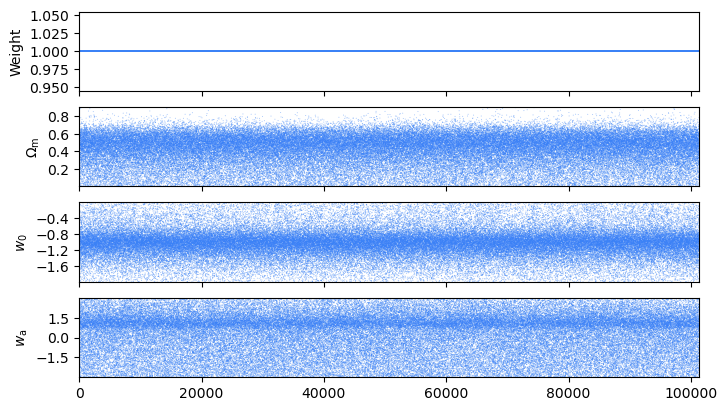

In [7]:
fig = consumer.plotter.plot_walks()  # convolve=100)

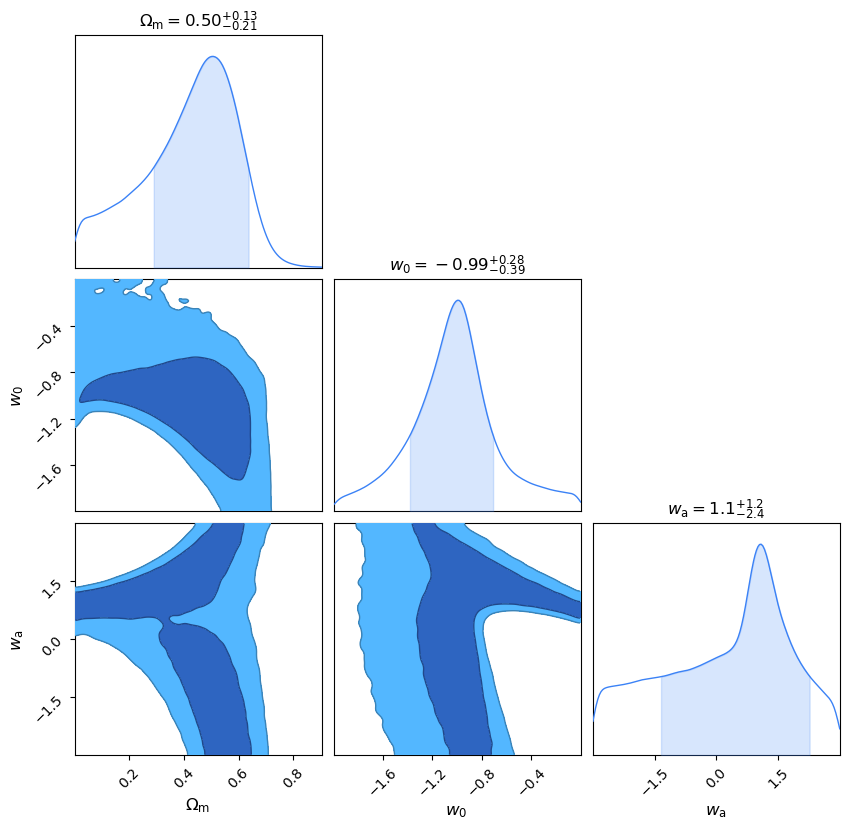

In [8]:
fig = consumer.plotter.plot()

# Lensed SNe

In [9]:
from lensed_sn import kwargs_sampler_lensed_sn
from lensed_sn import kwargs_emcee_lensed_sn
from lensed_sn import kwargs_likelihood_list_lensed_sn

In [10]:
n_run = 0
n_burn = 0
n_walkers = 84
continue_from_backend = True


kwargs_emcee_lensed_sn["n_run"] = n_run
kwargs_emcee_lensed_sn["n_burn"] = n_burn
kwargs_emcee_lensed_sn["n_walkers"] = n_walkers
kwargs_emcee_lensed_sn["continue_from_backend"] = continue_from_backend

kwargs_sampler_lensed_sn["custom_prior"] = CustomPrior(
    include_a_ani=False, include_li24=False, include_roman_sne_mp=True
)

mcmc_sampler_lensed_sn = MCMCSampler(
    kwargs_likelihood_list=kwargs_likelihood_list_lensed_sn, **kwargs_sampler_lensed_sn
)

if not run_mcmc_lensed_sn:
    kwargs_emcee_lensed_sn["n_run"] = 0

backend = emcee.backends.HDFBackend(
    os.path.join(posterior_directory, "lensed_snia_w0waCDM.h5")
)

emcee_sampler_lensed_sn = mcmc_sampler_lensed_sn.get_emcee_sampler(
    backend=backend, **kwargs_emcee_lensed_sn
)

0it [00:00, ?it/s]

0it [00:00, ?it/s]


In [11]:
emcee_sampler_lensed_sn.get_chain().shape

(32404, 84, 6)

In [12]:
lensed_sn_param_names = mcmc_sampler_lensed_sn.param_names(latex_style=True)

n_discard_lensed_sn = int(20000 / n_walkers)
chain = Chain.from_emcee(
    emcee_sampler_lensed_sn,
    lensed_sn_param_names,
    "Lensed SNIae",
    discard=n_discard_lensed_sn,
    thin=1,
)
consumer = ChainConsumer().add_chain(chain)

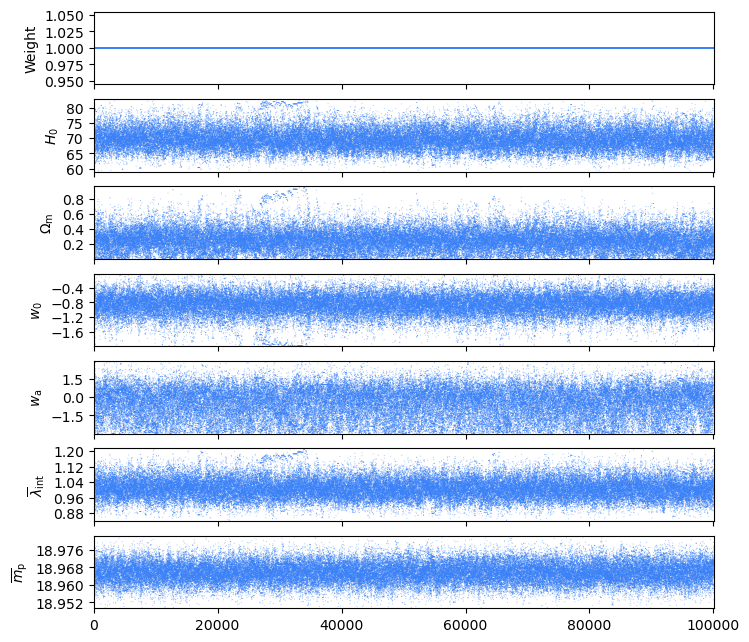

In [13]:
fig = consumer.plotter.plot_walks()

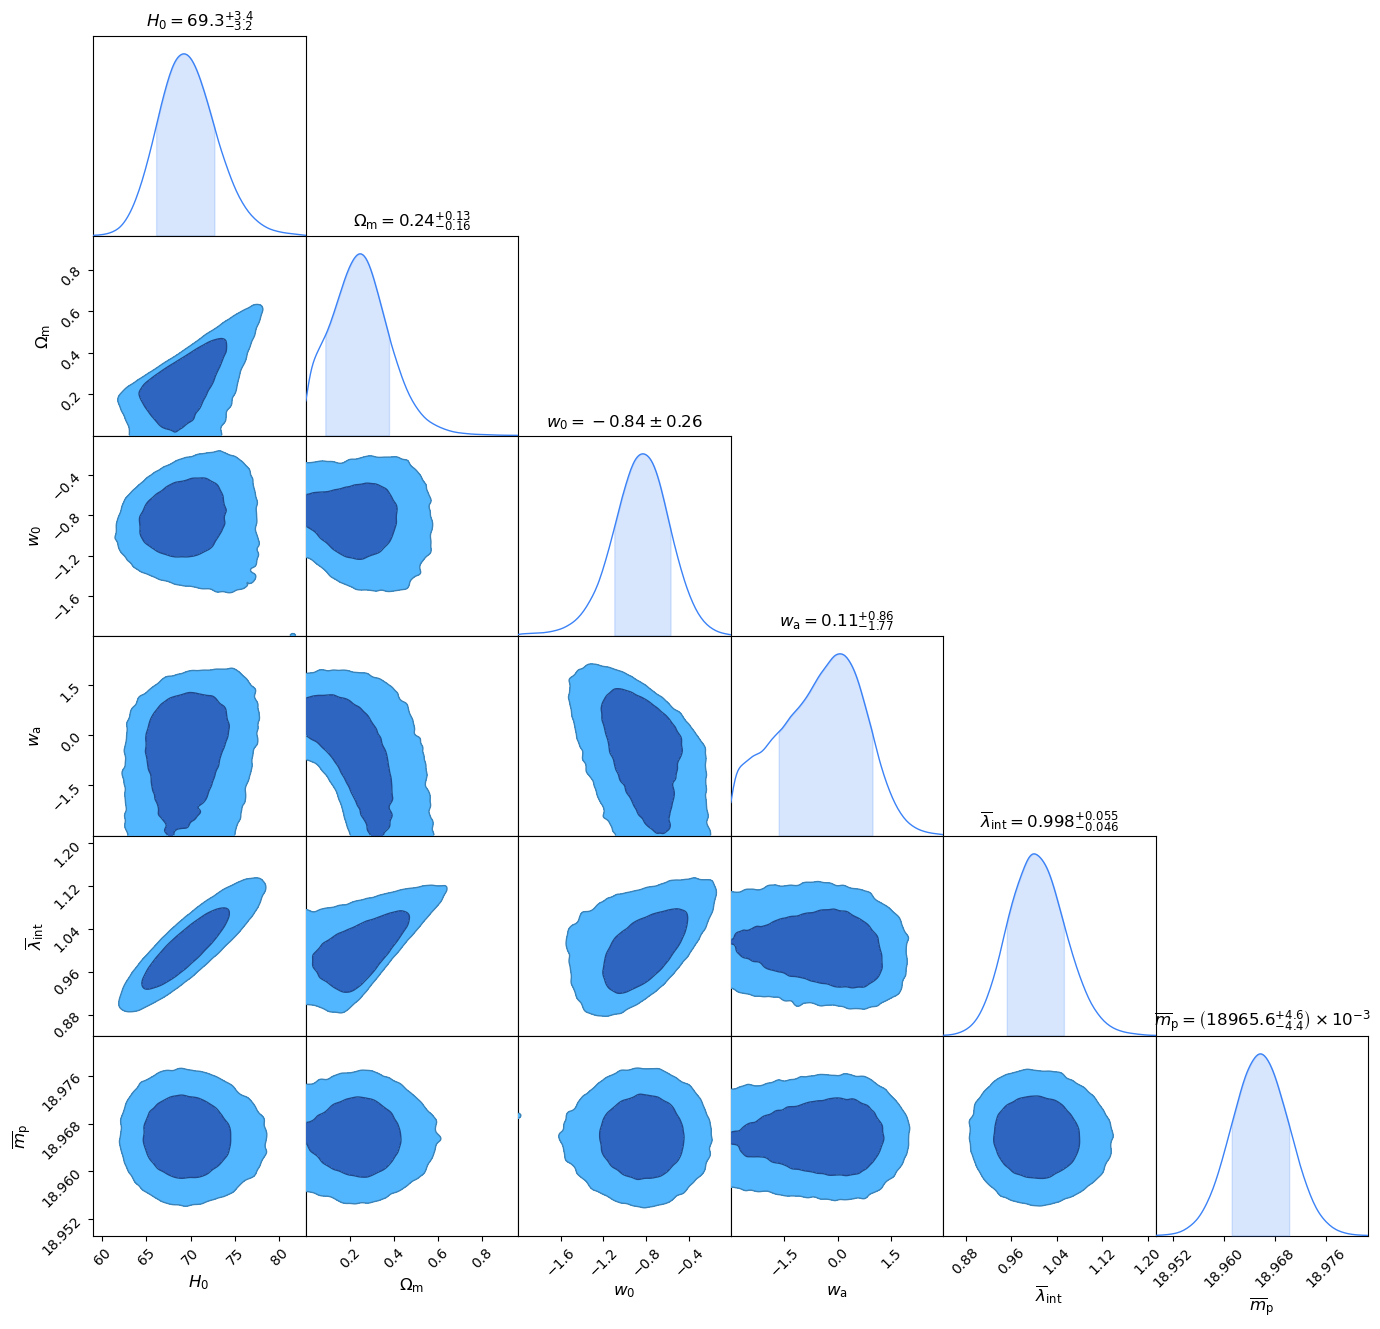

In [14]:
fig = consumer.plotter.plot()

# Lensed quasar

In [15]:
from lensed_quasar import kwargs_sampler_lensed_quasar
from lensed_quasar import kwargs_emcee_lensed_quasar
from lensed_quasar import kwargs_likelihood_list_lensed_quasar

In [16]:
n_run = 100
n_burn = 0
n_walkers = 84
continue_from_backend = True


kwargs_emcee_lensed_quasar["n_run"] = n_run
kwargs_emcee_lensed_quasar["n_burn"] = n_burn
kwargs_emcee_lensed_quasar["n_walkers"] = n_walkers
kwargs_emcee_lensed_quasar["continue_from_backend"] = continue_from_backend

kwargs_sampler_lensed_quasar["custom_prior"] = CustomPrior(
    include_a_ani=True, include_li24=False, include_roman_sne_mp=False
)

mcmc_sampler_lensed_quasar = MCMCSampler(
    kwargs_likelihood_list=kwargs_likelihood_list_lensed_quasar,
    **kwargs_sampler_lensed_quasar
)

if not run_mcmc_lensed_quasar:
    kwargs_emcee_lensed_quasar["n_run"] = 0

backend = emcee.backends.HDFBackend(
    os.path.join(posterior_directory, "lensed_quasar_w0waCDM.h5")
)

emcee_sampler_lensed_quasar = mcmc_sampler_lensed_quasar.get_emcee_sampler(
    backend=backend, **kwargs_emcee_lensed_quasar
)

0it [00:00, ?it/s]


In [17]:
lensed_quasar_param_names = mcmc_sampler_lensed_quasar.param_names(latex_style=True)

n_discard_lensed_quasar = int(10000 / n_walkers)
chain = Chain.from_emcee(
    emcee_sampler_lensed_quasar,
    lensed_quasar_param_names,
    "Lensed quasars",
    discard=n_discard_lensed_quasar,
    thin=1,
)
consumer = ChainConsumer().add_chain(chain)
# consumer.add_chain(chain)

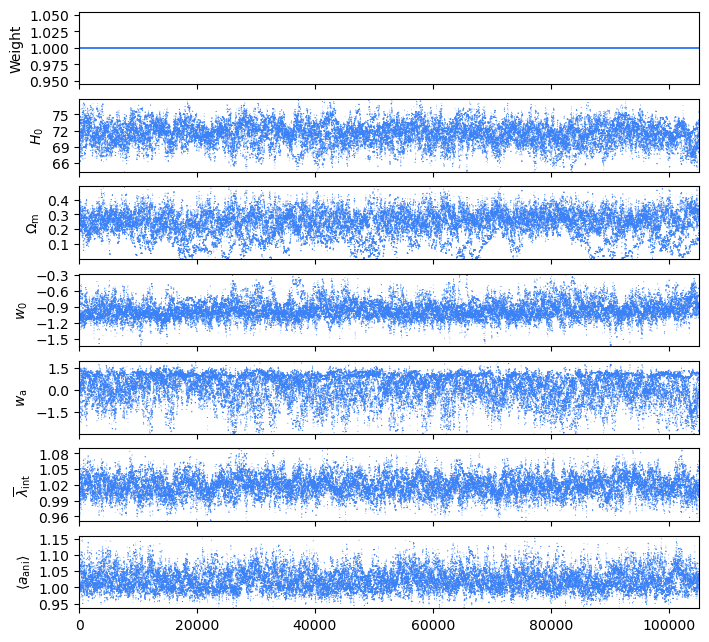

In [18]:
fig = consumer.plotter.plot_walks()

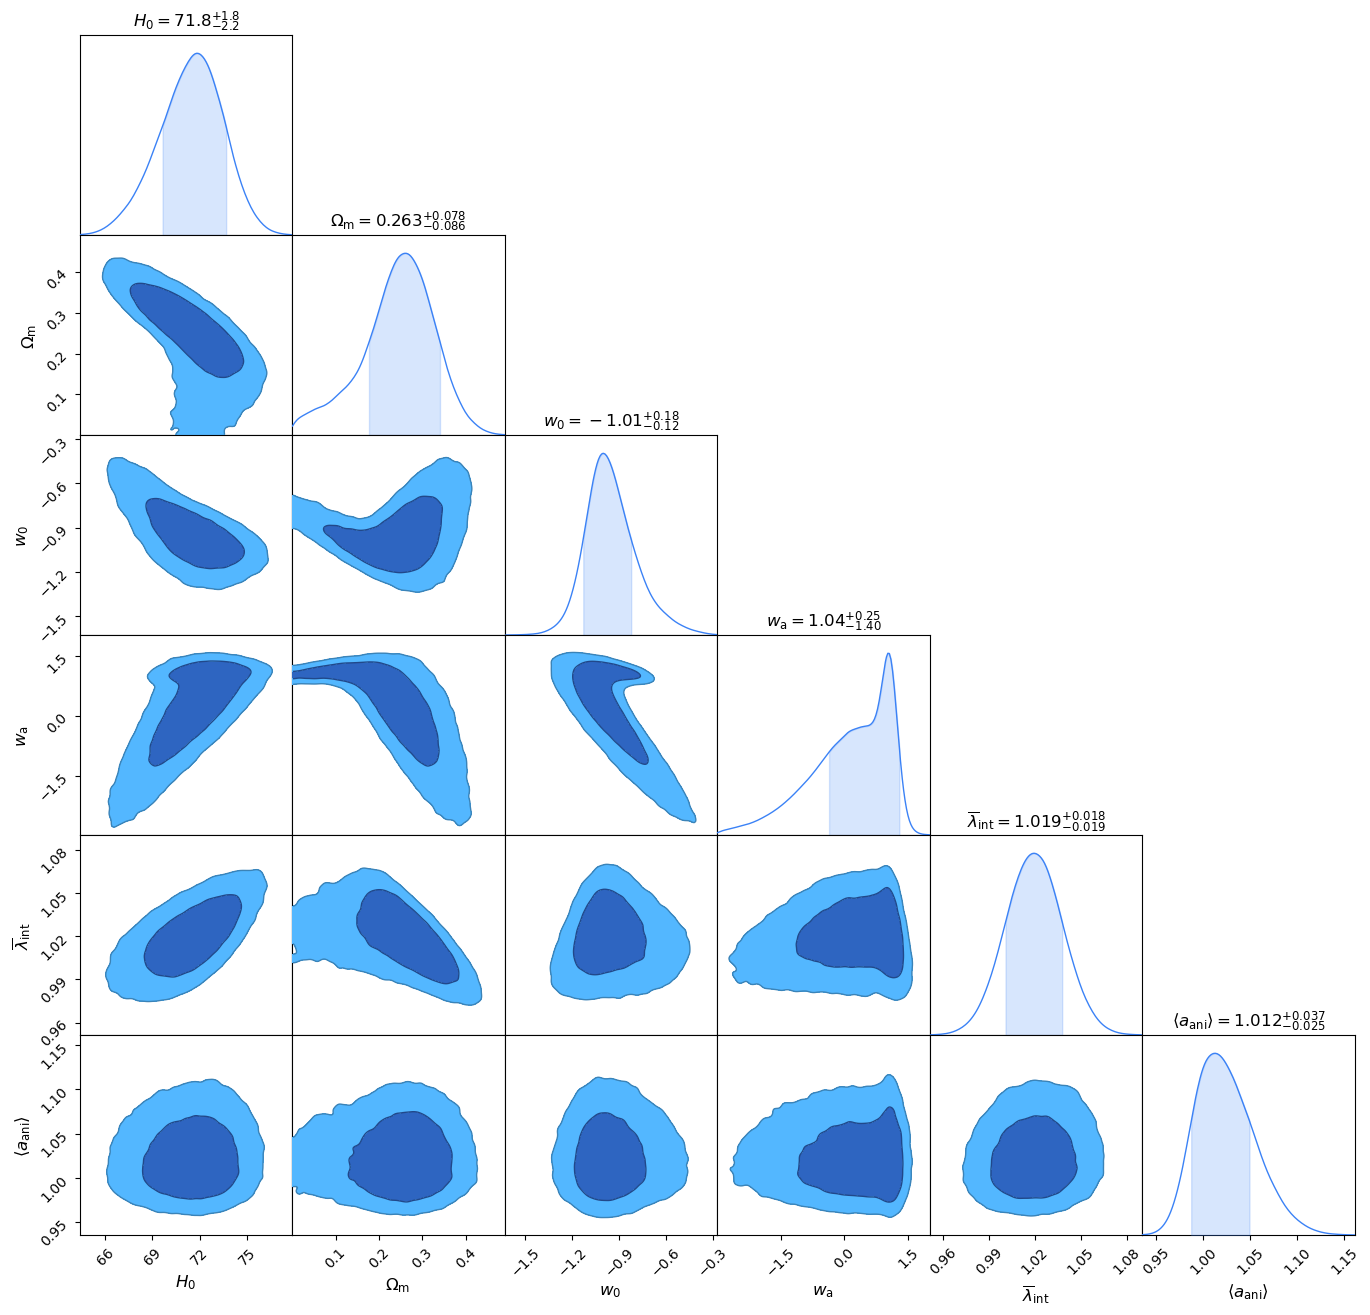

In [19]:
fig = consumer.plotter.plot()

# Combined 

In [20]:
kwargs_sampler_joint_sn_quasar = deepcopy(kwargs_sampler_lensed_sn)

for key in [
    "kwargs_upper_cosmo",
    "kwargs_lower_cosmo",
    "kwargs_fixed_cosmo",
    "kwargs_upper_source",
    "kwargs_lower_source",
    "kwargs_fixed_source",
    "kwargs_upper_lens",
    "kwargs_lower_lens",
    "kwargs_fixed_lens",
    "kwargs_upper_los",
    "kwargs_lower_los",
    "kwargs_fixed_los",
    "kwargs_upper_kin",
    "kwargs_lower_kin",
    "kwargs_fixed_kin",
]:
    if key in kwargs_sampler_lensed_quasar["kwargs_bounds"]:
        if (
            kwargs_sampler_joint_sn_quasar["kwargs_bounds"][key]
            != kwargs_sampler_lensed_quasar["kwargs_bounds"][key]
        ):
            kwargs_sampler_joint_sn_quasar["kwargs_bounds"][key].update(
                kwargs_sampler_lensed_quasar["kwargs_bounds"][key]
            )

kwargs_sampler_joint_sn_quasar["anisotropy_sampling"] = kwargs_sampler_lensed_quasar[
    "anisotropy_sampling"
]

for key in kwargs_sampler_lensed_quasar.keys():
    if key not in kwargs_sampler_joint_sn_quasar.keys():
        kwargs_sampler_joint_sn_quasar[key] = kwargs_sampler_lensed_quasar[key]

kwargs_emcee_sl_combined = deepcopy(kwargs_emcee_lensed_sn)
kwargs_emcee_sl_combined["kwargs_mean_start"]["kwargs_kin"] = (
    kwargs_emcee_lensed_quasar["kwargs_mean_start"]["kwargs_kin"]
)
kwargs_emcee_sl_combined["kwargs_sigma_start"]["kwargs_kin"] = (
    kwargs_emcee_lensed_quasar["kwargs_sigma_start"]["kwargs_kin"]
)

In [21]:
n_run = 10
n_burn = 0
n_walkers = 3 * 28
continue_from_backend = True


kwargs_emcee_sl_combined["n_run"] = n_run
kwargs_emcee_sl_combined["n_burn"] = n_burn
kwargs_emcee_sl_combined["n_walkers"] = n_walkers
kwargs_emcee_sl_combined["continue_from_backend"] = continue_from_backend

kwargs_sampler_joint_sn_quasar["custom_prior"] = CustomPrior(
    include_a_ani=True, include_li24=True, include_roman_sne_mp=True
)

mcmc_sampler_sl_combined = MCMCSampler(
    kwargs_likelihood_list=kwargs_likelihood_list_lensed_quasar
    + kwargs_likelihood_list_lensed_sn
    + kwargs_likelihood_list_dspl,
    **kwargs_sampler_joint_sn_quasar
)

if not run_mcmc_sl_combined:
    kwargs_emcee_sl_combined["n_run"] = 0

backend = emcee.backends.HDFBackend(
    os.path.join(posterior_directory, "combined_all_w0waCDM.h5")
)

emcee_sampler_sl_combined = mcmc_sampler_sl_combined.get_emcee_sampler(
    backend=backend, **kwargs_emcee_sl_combined
)

0it [00:00, ?it/s]


In [22]:
sl_combined_param_names = mcmc_sampler_sl_combined.param_names(latex_style=True)

n_discard_sl_combined = 30000
chain = Chain.from_emcee(
    emcee_sampler_sl_combined,
    sl_combined_param_names,
    "Combined",
    discard=int(n_discard_sl_combined / n_walkers),
    thin=1,
)
consumer = ChainConsumer().add_chain(chain)

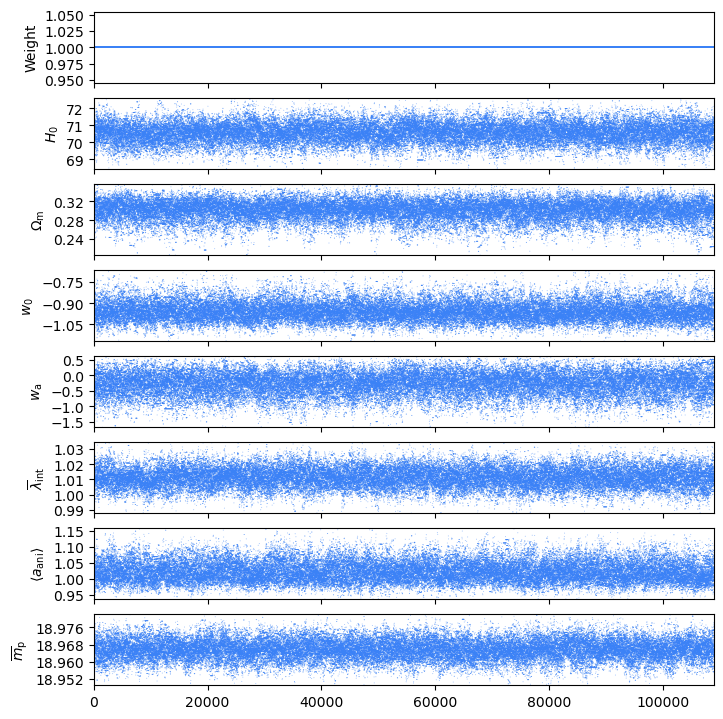

In [23]:
fig = consumer.plotter.plot_walks()

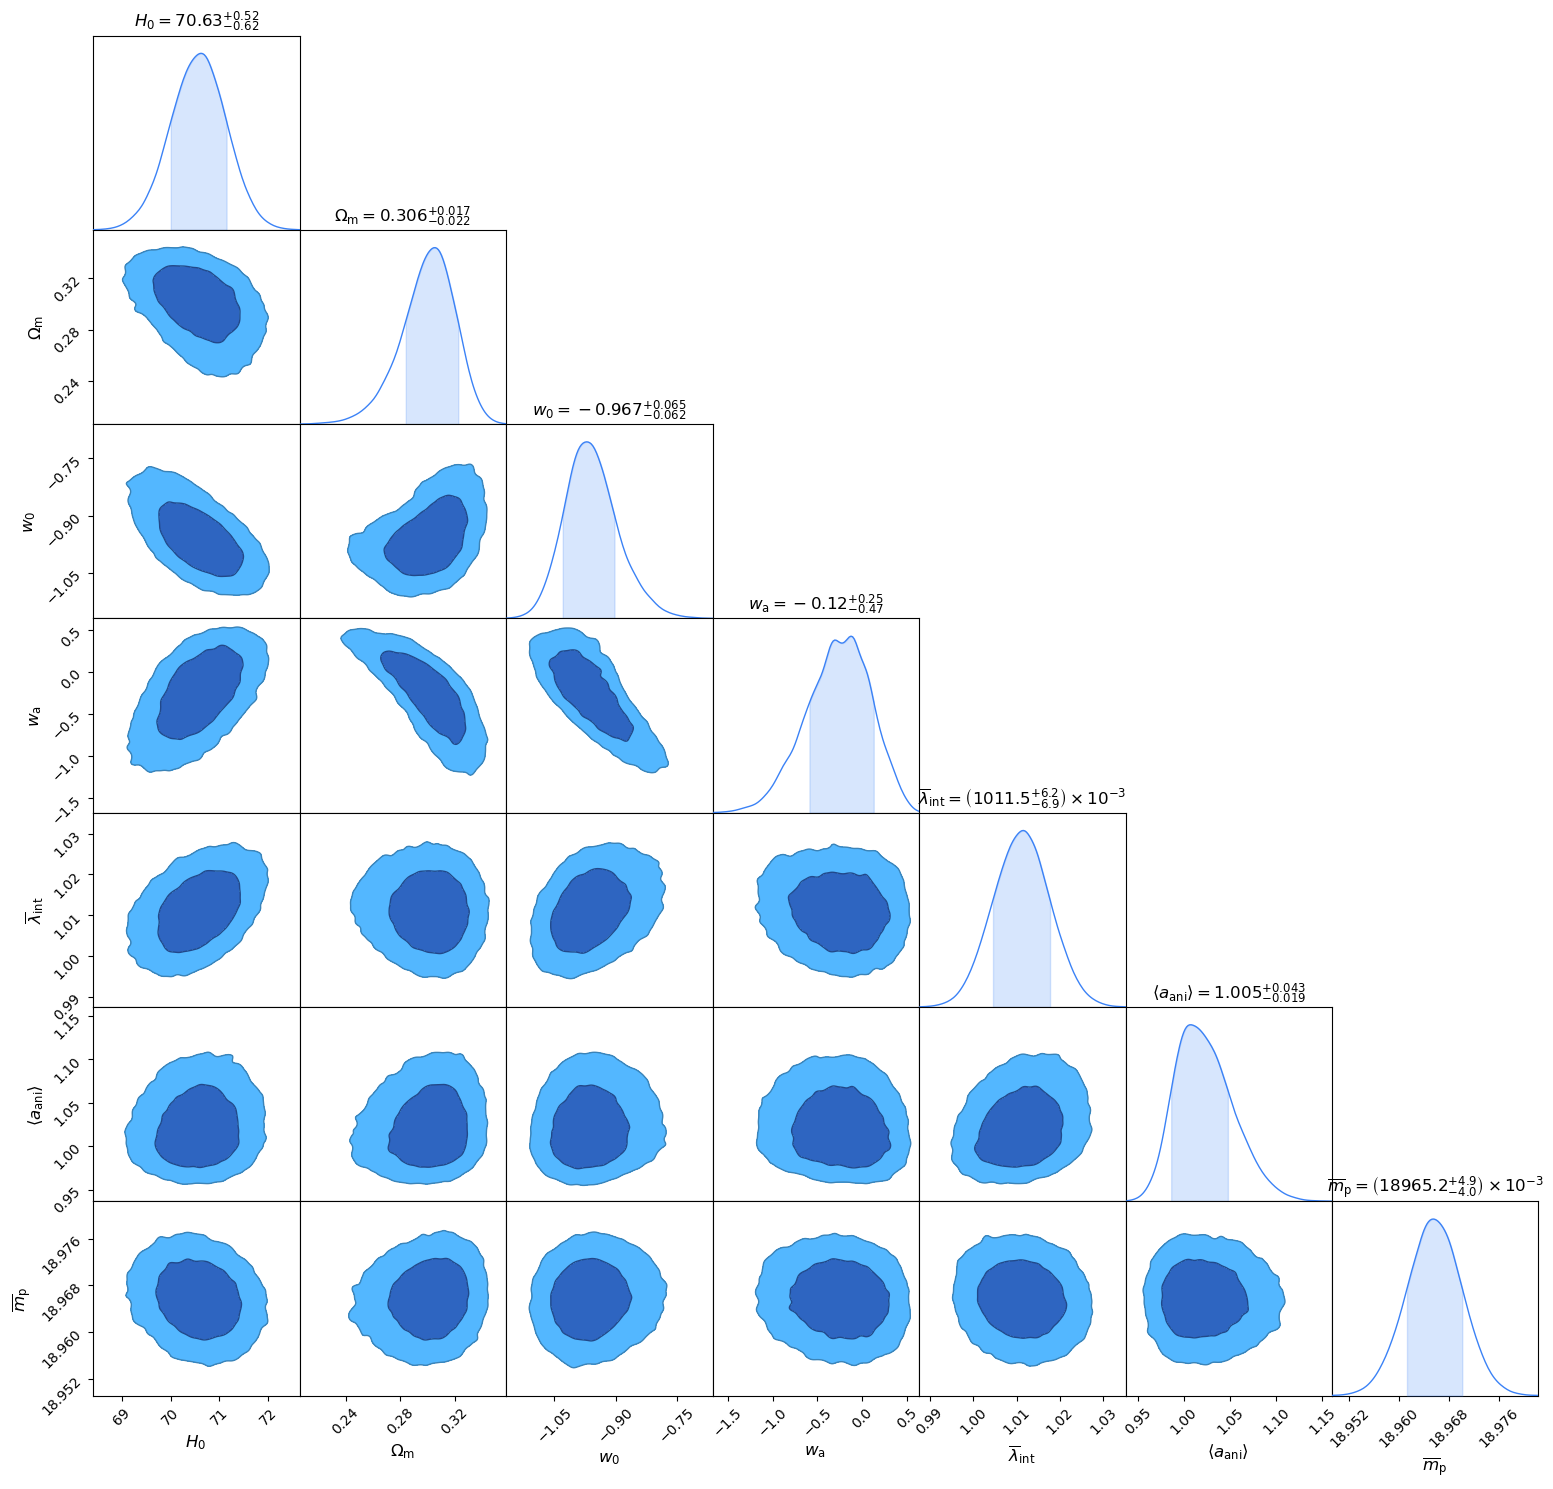

In [24]:
fig = consumer.plotter.plot()

# Make combined plots

In [25]:
set_fontscale(2.0)

figure_width_inches = page_width_in * 2

In [26]:
posterior_3t2pt = DataFrame(
    np.genfromtxt("./desc_srd18/Y10_3x2.txt"),
    columns=[
        r"$\\Omega_{\\rm m}$",
        r"$\\sigma_8$",
        r"$n_{\\rm s}$",
        r"$w_0$",
        r"$w_a$",
        r"$\\Omega_{\\rm b}$",
        r"$H_0$",
    ],
)

posterior_clustering = DataFrame(
    np.genfromtxt("./desc_srd18/Y10_CL.txt"),
    columns=[
        r"$\\Omega_{\\rm m}$",
        r"$\\sigma_8$",
        r"$n_{\\rm s}$",
        r"$w_0$",
        r"$w_a$",
        r"$\\Omega_{\\rm b}$",
        r"$H_0$",
    ],
)

posterior_supernovae = DataFrame(
    np.genfromtxt("./desc_srd18/Y10_SN.txt"),
    columns=[
        r"$\\Omega_{\\rm m}$",
        r"$\\sigma_8$",
        r"$n_{\\rm s}$",
        r"$w_0$",
        r"$w_a$",
        r"$\\Omega_{\\rm b}$",
        r"$H_0$",
    ],
)

In [27]:
dspl_param_names[-1] = r"$w_a$"
lensed_sn_param_names[3] = r"$w_a$"
lensed_quasar_param_names[3] = r"$w_a$"
sl_combined_param_names[3] = r"$w_a$"

In [37]:
dspl_chain = Chain.from_emcee(
    emcee_sampler_dspl,
    dspl_param_names,
    "Double-source-plane lenses",
    discard=n_discard_dspl,
    thin=1,
    color="coolGray",
)

lensed_sn_chain = Chain.from_emcee(
    emcee_sampler_lensed_sn,
    lensed_sn_param_names,
    "Lensed Type Ia supernovae",
    discard=n_discard_lensed_sn,
    thin=1,
    color="lime",
)

lensed_quasar_chain = Chain.from_emcee(
    emcee_sampler_lensed_quasar,
    lensed_quasar_param_names,
    "Lensed quasars",
    discard=n_discard_lensed_quasar,
    thin=1,
    color="sky",
)

spl_chain = Chain(samples=li24_df, name="Lenses with kinematics", color="orange")

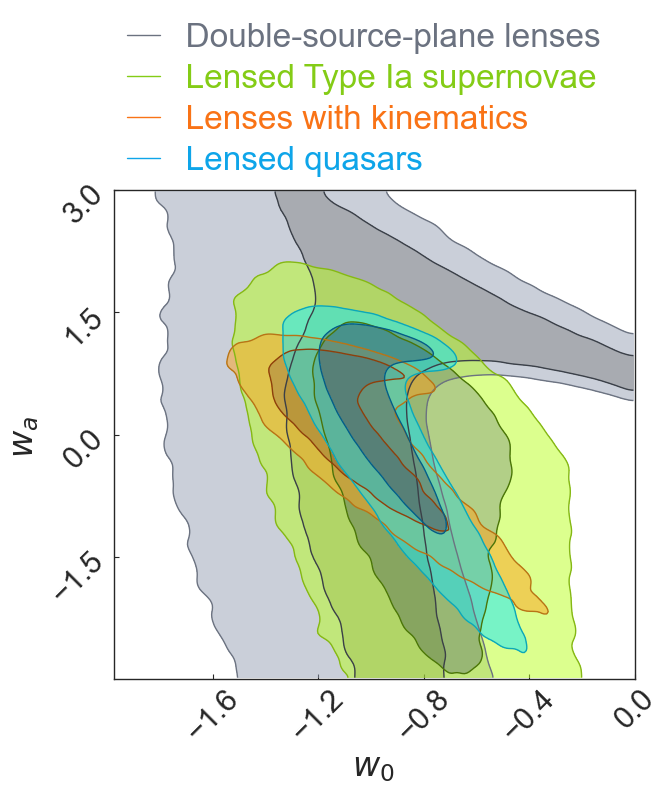

In [42]:
consumer = ChainConsumer()

consumer.add_chain(dspl_chain)
consumer.add_chain(lensed_sn_chain)
consumer.add_chain(spl_chain)
consumer.add_chain(lensed_quasar_chain)
# consumer.add_chain(sl_combined_chain)

consumer.set_plot_config(
    PlotConfig(
        sigmas=[0.5, 1, 2],
        extents={
            # r"$\Omega_{\rm m}$": [0.0, 0.8],
            r"$w_0$": [-1.975, -0.0],
            r"$w_a$": [-3, 3],
        },
        plot_hists=False,
        legend_kwargs={
            "loc": "upper left",
            "bbox_to_anchor": (0, 1.37),
            "fontsize": 24,
        },
        legend_artists=False,
        tick_font_size=22,
        label_font_size=24,
    )
)

# consumer.set_override(ChainConfig(kde=2.0))
# consumer.set_override(
#     ChainConfig(
#         shade_alpha=0.5,
#         # sigmas=np.linspace(0, 1, 10).tolist(),
#         shade_gradient=2.0,
#         # plot_cloud=True,
#     )
# )

fig = consumer.plotter.plot(
    columns=[r"$w_0$", r"$w_a$"],
    figsize=(figure_width_inches * 0.6, figure_width_inches * 0.6),
)

fig.axes[0].get_legend().set_zorder(100)
# fig.axes[0].get_legend().set_frame_on(True)
fig.axes[0].get_legend().set_alpha(0.1)

if save_figures:
    fig.savefig("figures/fig2a.pdf", bbox_inches="tight")

plt.show()

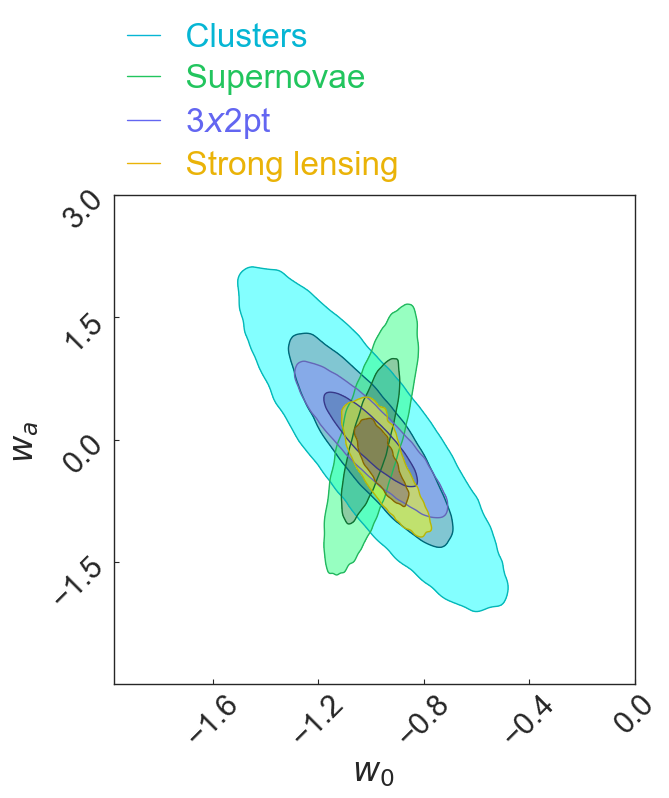

In [43]:
consumer = ChainConsumer()

clustering_chain = Chain(samples=posterior_clustering, name="Clusters", color="cyan")
sne_chain = Chain(samples=posterior_supernovae, name="Supernovae", color="green")
three2pt_chain = Chain(samples=posterior_3t2pt, name=r"3$x$2pt", color="indigo")

sl_combined_chain = Chain.from_emcee(
    emcee_sampler_sl_combined,
    sl_combined_param_names,
    "Strong lensing",
    discard=int(n_discard_sl_combined / n_walkers),
    thin=1,
    color="yellow",
)

consumer.add_chain(clustering_chain)
consumer.add_chain(sne_chain)
consumer.add_chain(three2pt_chain)
consumer.add_chain(sl_combined_chain)

# consumer.set_plot_config(PlotConfig(sigmas=[0.5, 1, 2], plot_hists=False))


consumer.set_plot_config(
    PlotConfig(
        sigmas=[0.5, 1, 2],
        extents={
            # r"$\Omega_{\rm m}$": [0.0, 0.8],
            r"$w_0$": [-1.975, -0.0],
            r"$w_a$": [-3, 3],
        },
        plot_hists=False,
        legend_kwargs={
            "loc": "upper left",
            "bbox_to_anchor": (0, 1.38),
            "fontsize": 24,
        },
        legend_artists=False,
        tick_font_size=22,
        label_font_size=24,
    )
)

# consumer.set_override(ChainConfig(kde=2.0))

fig = consumer.plotter.plot(
    columns=[r"$w_0$", r"$w_a$"],
    figsize=(figure_width_inches * 0.6, figure_width_inches * 0.6),
)

fig.axes[0].get_legend().set_zorder(100)
# fig.axes[0].get_legend().set_frame_on(True)
fig.axes[0].get_legend().set_alpha(0.1)

if save_figures:
    fig.savefig("figures/fig2b.pdf", bbox_inches="tight")

plt.show()

In [44]:
for chain in [clustering_chain, sne_chain, three2pt_chain, sl_combined_chain]:
    cov = chain.get_covariance([r"$w_0$", r"$w_a$"]).matrix

    fisher = np.linalg.inv(cov)
    fom = np.sqrt(np.linalg.det(fisher))

    print(f"{chain.name} FoM: {fom:.0f}")

Clusters FoM: 11
Supernovae FoM: 32
3$x$2pt FoM: 48
Strong lensing FoM: 69
